In [1]:
%matplotlib widget

In [2]:
# initialization
from rayoptics.environment import *

In [3]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [4]:
app = AppManager(None)

# Create or Open a new model

In [5]:
app.model = open_model(root_pth/"codev/tests/questar35.seq")
opm = app.model
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

## Define first order aperture and field for system

In [6]:
#osp.pupil = PupilSpec(type="FNO", value=10.)
#osp.field_of_view = FieldSpec(type="IMG_HT", flds=[0., 0.5])
osp.parax_data.fod.list_first_order_data()

efl                50.5
ffl                -212
pp1              -161.5
bfl               10.22
ppk               40.28
f/#               14.41
red          -1.443e+07
obj_dist      7.287e+08
obj_ang            0.25
enp_dist          6.351
enp_radius        1.752
na obj        2.404e-09
n obj                 1
img_dist          10.16
img_ht           0.2203
exp_dist         -1.465
exp_radius       0.4052
na img         -0.03467
n img                 1
optical invariant     0.007644


## Define interface and gap data for the sequential model

In [7]:
#sm.gaps[0].thi=1e10

#sm.insert(srf.Surface(lbl='M1', interact_mode=imode.Reflect, profile=Conic(c=-0.01)), Gap(-33.))

#sm.insert(srf.Surface(lbl='M2', interact_mode=imode.Reflect, profile=Conic(c=-0.01)), Gap(50.))
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=InteractionMode.Transmit)
1 Surface(profile=Spherical(c=-0.2779672329376499), interact_mode=InteractionMode.Transmit)
2 Surface(profile=Spherical(c=-0.2656588696905559), interact_mode=InteractionMode.Transmit)
3 Surface(profile=Spherical(c=-0.06219776663591262), interact_mode=InteractionMode.Reflect)
4 Surface(profile=Spherical(c=-0.2656588696905559), interact_mode=InteractionMode.Reflect)
5 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode=InteractionMode.Transmit)


## Update the model

In [8]:
opm.update_model()

## Build the paraxial model and list

In [9]:
pm.list_lens()
print("\n")
osp.parax_data.fod.list_first_order_data()

      ax_ray_ht    ax_ray_slp
0:            0   2.40439e-09
1:        1.752      0.252394
2:       1.7992    0.00467172
3:       1.8301     -0.222988
4:      0.35439    -0.0346924
5:    0.0019734    -0.0346924

      pr_ray_ht    pr_ray_slp
0:  -3.1794e+06    0.00436335
1:    -0.027713   0.000370947
2:    -0.027643    0.00417701
3:   7.4856e-11    0.00417701
4:     0.027643     0.0188645
5:      0.21928     0.0188645

           power           tau        index    type
0:             0    7.2865e+08      1.00000    Transmit
1:    -0.1440632       0.18717      1.51827    Transmit
2:     0.1376841         6.618      1.00000    Transmit
3:     0.1243955         6.618     -1.00000    Reflect
4:    -0.5313177        10.158      1.00000    Reflect
5:             0             0      1.00000    Transmit


efl                50.5
ffl                -212
pp1              -161.5
bfl               10.22
ppk               40.28
f/#               14.41
red          -1.443e+07
obj_dist      7.287e+0

In [10]:
abr_fan_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', scale_type=Fit.All_Same)
wav_fan_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='OPD', scale_type=Fit.All_Same)

FigureCanvasNbAgg()

FigureCanvasNbAgg()

In [11]:
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=opm)

FigureCanvasNbAgg()

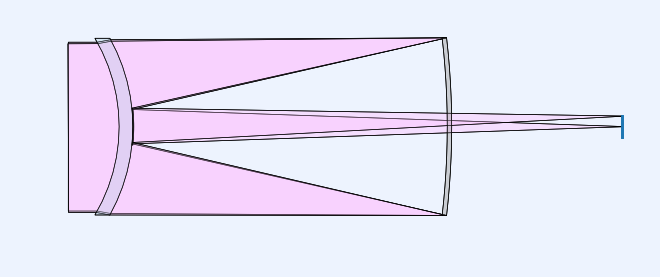

In [12]:
layout_plt.update_data()
layout_plt.plot()

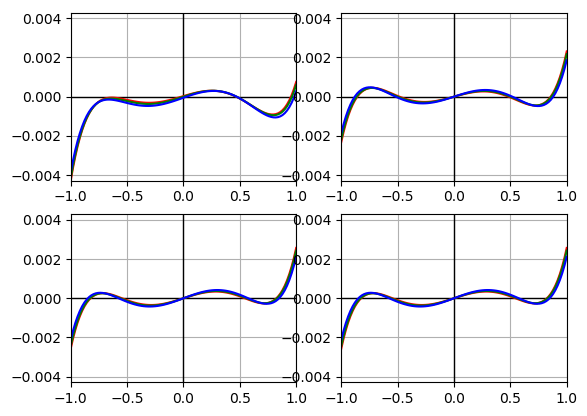

In [13]:
abr_fan_plt.update_data()
abr_fan_plt.plot()

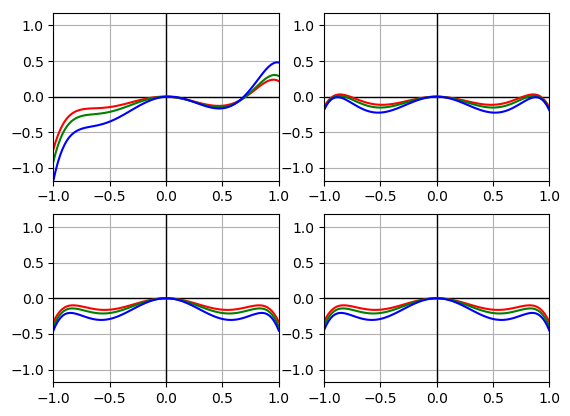

In [14]:
wav_fan_plt.update_data()
wav_fan_plt.plot()

In [15]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(1)
grid=sm.trace_wavefront(fld, wvl, foc, num_rays=64)

In [16]:
grid = np.rollaxis(grid, 2)
max_val = max(np.max(grid[2]), -np.min(grid[2])); max_val

0.8685667653157316

In [17]:
fig, axes = plt.subplots()
#fig, axes = plt.subplots(1, 2, figsize=(8, 4))
im = axes.imshow(grid[2].T, cmap=mpl.cm.RdBu_r, vmin=-max_val, vmax=max_val, extent=[-1, 1, -1, 1], origin='lower')
#im.set_interpolation('bilinear')
cb = fig.colorbar(im, ax=axes)
fig.tight_layout()

FigureCanvasNbAgg()

In [18]:
fig = plt.figure()
vmin = -max_val
vmax = max_val
levs = np.linspace(np.floor(vmin), np.ceil(vmax), num=20)

plt.contour(grid[2].T, levs, colors='black', linewidths=1, vmin=vmin, vmax=vmax)
plt.contourf(grid[2].T, levs, cmap=mpl.cm.RdBu_r, vmin=vmin, vmax=vmax)
plt.colorbar()
plt.show()

FigureCanvasNbAgg()